In [23]:
#import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import itertools

In [24]:
#dataset
data = {
    'dept_id': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8'],
    'building': ['North', 'North', 'East', 'South', 'East', 'South', 'West', 'North'],
    'avg_wait_min': [15, 12, 18, 20, 10, 25, 14, 11],
    'peak_patients_per_hr': [120, 95, 140, 110, 160, 90, 105, 130]
}
df = pd.DataFrame(data)

In [25]:
#1-Build a graph
G = nx.Graph()
departments = df['dept_id'].tolist()
G.add_nodes_from(departments)
for building_name in df['building'].unique():
    depts_in_building = df[df['building'] == building_name]['dept_id'].tolist()
    # Add edges between all pairs of departments in the same building
    for u, v in itertools.combinations(depts_in_building, 2):
        G.add_edge(u, v)


In [28]:
#count edges
num_edges = G.number_of_edges()
print(f"number of edges: {num_edges}")

number of edges: 5


In [29]:
#find which department highest degree
max_degree_node = max(G.degree, key=lambda x: x[1])[0]
print(f"Department with the highest degree: {max_degree_node}")


Department with the highest degree: D1


In [71]:
#Verify the handshake theorem on this graph.
sum_of_degrees = sum(dict(G.degree()).values())
print(f"Sum of degrees:{2 * num_edges}")

Sum of degrees:10


In [45]:
#Compute the shortest path between D1 and D7
try:
    path = nx.shortest_path(G, source='D1', target='D7')
    print(f"Shortest path between D1 and D7: {path}")
except nx.NetworkXNoPath:
    print("No path exists between D1 and D7.")

No path exists between D1 and D7.


In [53]:
# 6.Calculate the degree centrality of each department.
deg_centrality = nx.degree_centrality(G)
print("Degree Centrality:")
for dept, centrality in deg_centrality.items():
    print(f"{dept}: {centrality}")


Degree Centrality:
D1: 0.2857142857142857
D2: 0.2857142857142857
D3: 0.14285714285714285
D4: 0.14285714285714285
D5: 0.14285714285714285
D6: 0.14285714285714285
D7: 0.0
D8: 0.2857142857142857


In [54]:
# 7.Compute the eccentricity of all nodes. Identify the center and periphery of the graph.
if nx.is_connected(G):
    eccentricity = nx.eccentricity(G)
    centers = nx.center(G)
    periphery = nx.periphery(G)
else:
    eccentricity = {}
    centers, periphery = [], []
    for comp in nx.connected_components(G):
        sub = G.subgraph(comp).copy()
        eccentricity.update(nx.eccentricity(sub))
        centers.extend(nx.center(sub))
        periphery.extend(nx.periphery(sub))
print("Eccentricity:")
for node, value in eccentricity.items():
    print(f"{node}: {value}")
print(f"Center: {centers}")
print(f"Periphery: {periphery}")

Eccentricity:
D1: 1
D2: 1
D8: 1
D5: 1
D3: 1
D6: 1
D4: 1
D7: 0
Center: ['D1', 'D2', 'D8', 'D5', 'D3', 'D6', 'D4', 'D7']
Periphery: ['D1', 'D2', 'D8', 'D5', 'D3', 'D6', 'D4', 'D7']


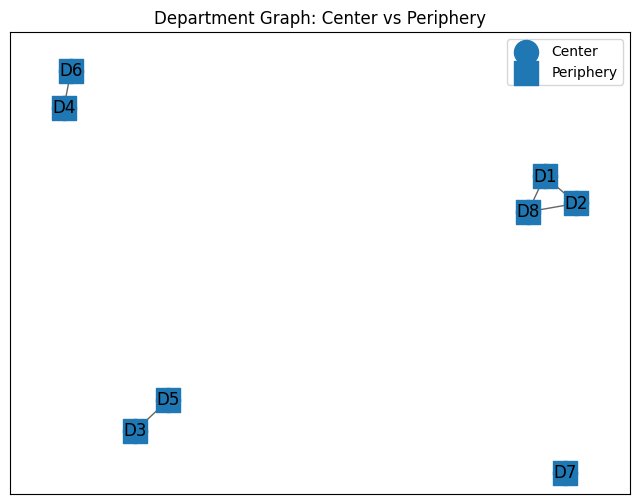

In [58]:
# 8. Draw the graph.
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,6))
nx.draw_networkx_edges(G, pos, alpha=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=centers, node_shape='o', label="Center")
nx.draw_networkx_nodes(G, pos, nodelist=periphery, node_shape='s', label="Periphery")
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.title("Department Graph: Center vs Periphery")
plt.show()

In [64]:
# 9. Define a label: center = 1 if a department’s degree ≥ 75th percentile, else center = 0 . Print the updated dataset.
percentile_75 = df['avg_wait_min'].quantile(0.75)
df['center'] = df['avg_wait_min'].apply(lambda x: 1 if x >= percentile_75 else 0)
display(df)

,dept_id,building,avg_wait_min,peak_patients_per_hr,center,degree
0,D1,North,15,120,0,2
1,D2,North,12,95,0,2
2,D3,East,18,140,0,1
3,D4,South,20,110,1,1
4,D5,East,10,160,0,1
5,D6,South,25,90,1,1
6,D7,West,14,105,0,0
7,D8,North,11,130,0,2


In [62]:
# 10. Train a Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

X = df[['avg_wait_min', 'peak_patients_per_hr']]
y = df['center']

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)
print("\nDecision Tree Classifier trained.")


Decision Tree Classifier trained.


In [67]:
# 11. Report performance metrics.
y_pred = dt_classifier.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print("\nModel Performance Metrics:")
print(f"  Accuracy:  {accuracy:}")
print(f"  Precision: {precision:}")
print(f"  Recall:    {recall:}")


Model Performance Metrics:
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
